# King County House Sales - Deep Learning Model

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


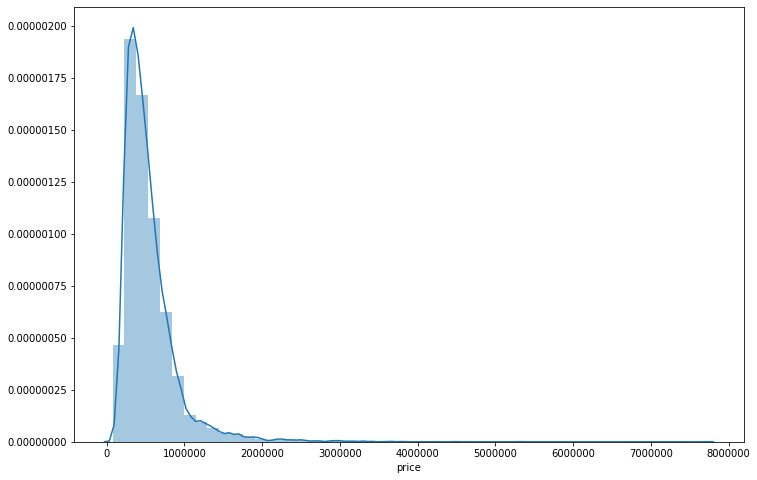

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

### The price feature shows a nice distribution with a peak around 500000. There are a few outliers with prices going up to 7700000. These may reduce the accuracy of the model and could be removed. 

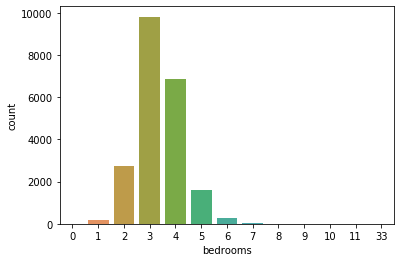

In [7]:
sns.countplot(df['bedrooms'])

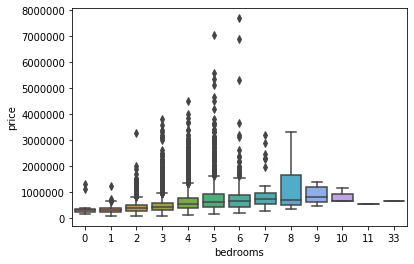

In [8]:
sns.boxplot(x='bedrooms',y='price',data=df)

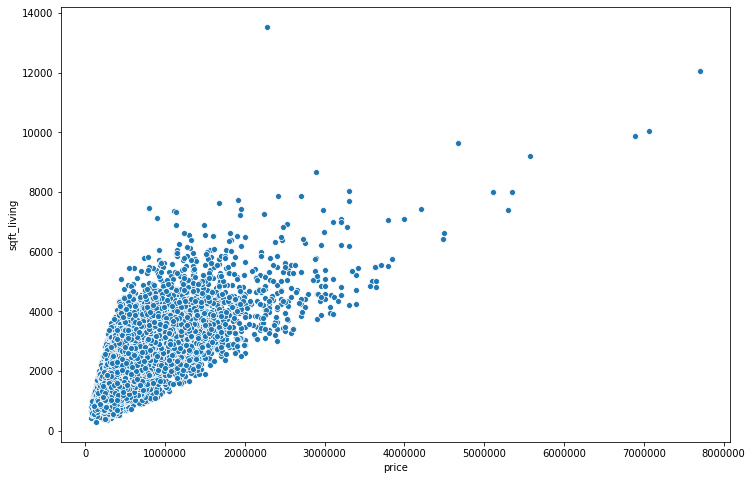

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

### These plots show the expected trend of increased living space and bedrooms increase the price of the property. The drop in price above 6 bedrooms is likely to be caused by the lack of data points for these values. 

### Geographical Properties

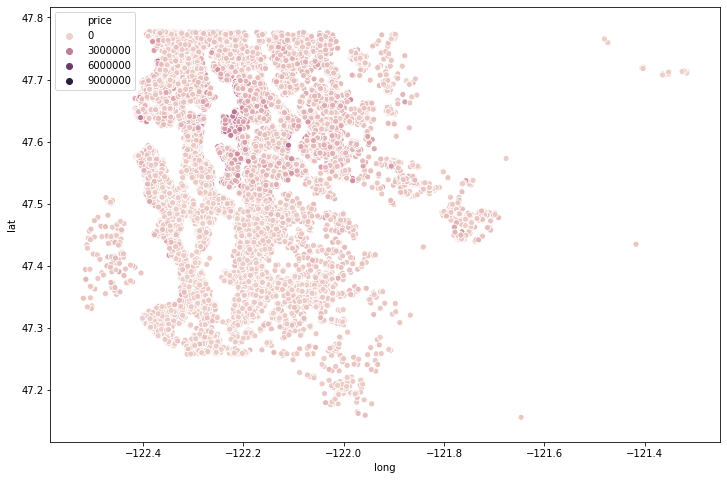

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### The 'lat' and 'long' features allow a map of the properties to be plotted. However, the few outliers in price are reducing the contrast of the hue. To make a clearer map I will remove them from the dataset. 

In [11]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [12]:
len(df)*(0.01)

216.13

In [13]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

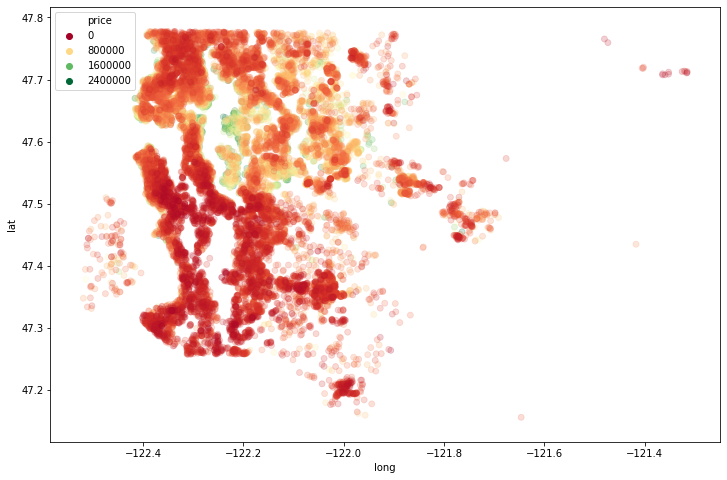

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Now we can see an expensive area in the middle of the map. Comparing the plot to a map of King County we can see the expensive area is Bellevue and Mercer Island. It also shows the waterfront properties tend to be more expensive. We also see a very dense area relating to Seattle.

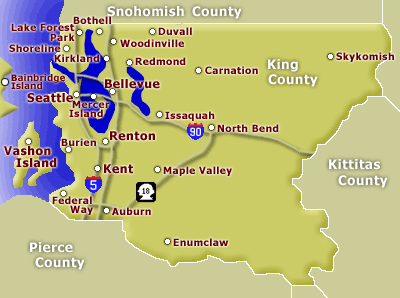

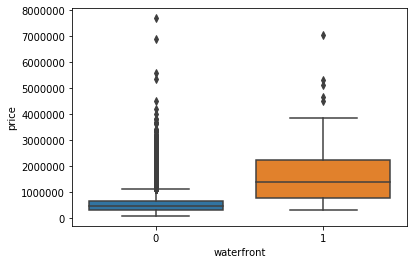

In [15]:
sns.boxplot(x='waterfront',y='price',data=df)

## Preprocessing

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df = df.drop('id',axis=1)

### Feature Engineering from Date

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df['month'] = df['date'].apply(lambda date:date.month)

In [20]:
df['year'] = df['date'].apply(lambda date:date.year)

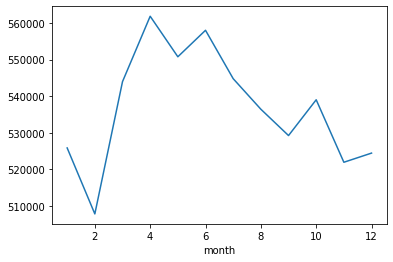

In [21]:
df.groupby('month').mean()['price'].plot()

### This plot shows a correlation between month of sale and price, with increased prices in spring/summer. This could be caused by houses seeming more appealing in warmer weather and could be looked into further by real estate companies. 

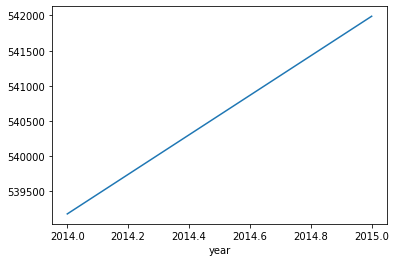

In [22]:
df.groupby('year').mean()['price'].plot()

In [23]:
df = df.drop('date',axis=1)

### The above plot shows an increase in house price with time. This is an expected trend in the housing market.

In [24]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

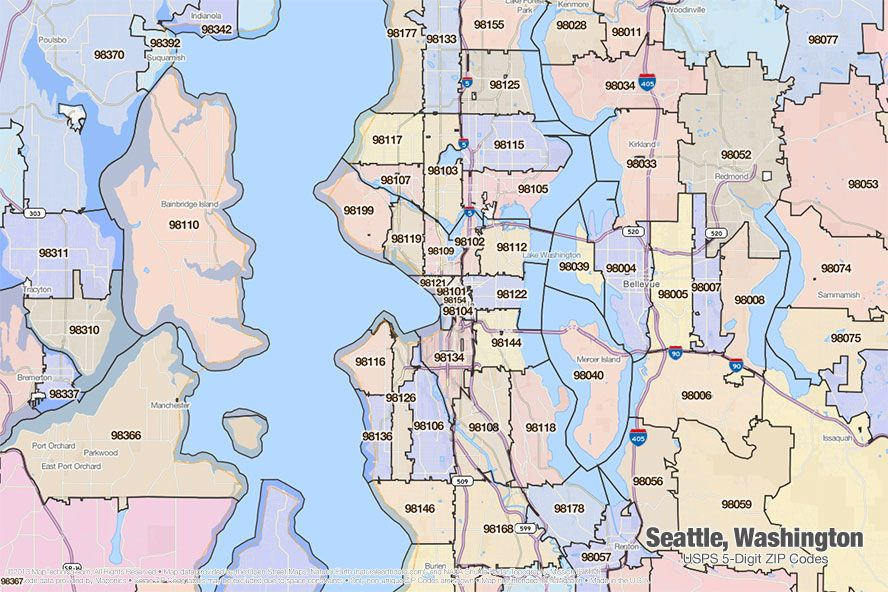

### The properties in the dataset can be split into 3 areas based on the first 3 numbers of their zipcode. These groups can then be made into categories with dummy variables. 

In [25]:
df['zipcode'] = df['zipcode'].apply(lambda x: round(x, -2))

In [26]:
zipcode_dummies = pd.get_dummies(df['zipcode'],drop_first=True)

In [27]:
df = pd.concat([df.drop('zipcode',axis=1),zipcode_dummies],axis=1)

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year,98100,98200
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,10,2014,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,12,2014,1,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,47.7379,-122.233,2720,8062,2,2015,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,12,2014,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,47.6168,-122.045,1800,7503,2,2015,1,0


In [29]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [30]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### These features have large counts for 0 but as these values would relate to a lower price these features still make sense and can be used.

### Train-test split

In [31]:
X = df.drop('price',axis=1)
y = df['price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train= scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

### MinMaxScaler is used to normalize the train and test input data sets. This ensures a balanced convergence of weights and biases, and also helps increase the speed of learning and prevents numerical overflow. To reduce data leakage, the scaler is only fitted with the train data set. 

## Building the model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [39]:
X_train.shape

(15129, 21)

In [40]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

### For a baseline model, I chose the same number of input nodes as there are features. I included 2 hidden layers both of which half the number of nodes of the previous. Dropout layers are added to reduce over-fitting by reducing the co-dependency of the neurons in the dense layers. I used the 'relu' activation function on the input and hidden layers to make the model less computationally taxing. 

## Training the model

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [42]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          callbacks = [early_stop],
          batch_size=128,
          epochs=400)

Train on 15129 samples, validate on 6484 samples
Epoch 1/400
15129/15129 [==============================] - 1s 78us/sample - loss: 423636528892.3619 - val_loss: 433076191383.6101
Epoch 2/400
15129/15129 [==============================] - 0s 24us/sample - loss: 423594245824.5287 - val_loss: 432957207682.7637
Epoch 3/400
15129/15129 [==============================] - 0s 28us/sample - loss: 423244083383.2898 - val_loss: 432233426643.3066
Epoch 4/400
15129/15129 [==============================] - 0s 27us/sample - loss: 421855329672.6382 - val_loss: 429913210394.8476
Epoch 5/400
15129/15129 [==============================] - 0s 24us/sample - loss: 418222720624.2548 - val_loss: 424683832670.5984
Epoch 6/400
15129/15129 [==============================] - 0s 26us/sample - loss: 410938505163.0707 - val_loss: 414913700683.9631
Epoch 7/400
15129/15129 [==============================] - 0s 31us/sample - loss: 398570051325.8510 - val_loss: 399407371652.5009
Epoch 8/400
15129/15129 [================

15129/15129 [==============================] - 0s 23us/sample - loss: 111366739246.3470 - val_loss: 82063328879.4966
Epoch 64/400
15129/15129 [==============================] - 0s 24us/sample - loss: 113078010409.3891 - val_loss: 81224381313.0265
Epoch 65/400
15129/15129 [==============================] - 0s 24us/sample - loss: 111423135466.2225 - val_loss: 80289832136.2517
Epoch 66/400
15129/15129 [==============================] - 0s 24us/sample - loss: 111427912629.2085 - val_loss: 79073906225.5891
Epoch 67/400
15129/15129 [==============================] - 0s 23us/sample - loss: 108420126837.0943 - val_loss: 78053926804.6095
Epoch 68/400
15129/15129 [==============================] - 0s 24us/sample - loss: 109816048667.9537 - val_loss: 77602261885.2363
Epoch 69/400
15129/15129 [==============================] - 0s 24us/sample - loss: 109197161902.1355 - val_loss: 76923914658.1912
Epoch 70/400
15129/15129 [==============================] - 0s 23us/sample - loss: 111392076280.9270 - 

15129/15129 [==============================] - 0s 24us/sample - loss: 89923430369.2712 - val_loss: 54226125345.7964
Epoch 127/400
15129/15129 [==============================] - 0s 24us/sample - loss: 91143295736.7747 - val_loss: 54244858117.5275
Epoch 128/400
15129/15129 [==============================] - 0s 24us/sample - loss: 93456448329.0486 - val_loss: 54302168702.6576
Epoch 129/400
15129/15129 [==============================] - 0s 24us/sample - loss: 90400931413.3164 - val_loss: 53781982249.0611
Epoch 130/400
15129/15129 [==============================] - 0s 24us/sample - loss: 89283405191.9614 - val_loss: 53786421729.3621
Epoch 131/400
15129/15129 [==============================] - 0s 24us/sample - loss: 88748755710.5956 - val_loss: 53382832385.7372
Epoch 132/400
15129/15129 [==============================] - 0s 24us/sample - loss: 90790128735.7737 - val_loss: 53049345662.6576
Epoch 133/400
15129/15129 [==============================] - 0s 24us/sample - loss: 91177732461.6321 - v

15129/15129 [==============================] - 0s 24us/sample - loss: 84870714252.3271 - val_loss: 49084397518.7267
Epoch 190/400
15129/15129 [==============================] - 0s 24us/sample - loss: 85565490143.7144 - val_loss: 48356256407.2943
Epoch 191/400
15129/15129 [==============================] - 0s 23us/sample - loss: 85603436426.9057 - val_loss: 48540708540.5651
Epoch 192/400
15129/15129 [==============================] - 0s 24us/sample - loss: 86310237300.0791 - val_loss: 48441819803.0845
Epoch 193/400
15129/15129 [==============================] - 0s 24us/sample - loss: 83844612366.4676 - val_loss: 48830589758.0654
Epoch 194/400
15129/15129 [==============================] - 0s 23us/sample - loss: 84912627240.6446 - val_loss: 48427399543.2350
Epoch 195/400
15129/15129 [==============================] - 0s 25us/sample - loss: 87547402916.4397 - val_loss: 48917172893.6114
Epoch 196/400
15129/15129 [==============================] - 0s 26us/sample - loss: 88076118770.1416 - v

15129/15129 [==============================] - 0s 24us/sample - loss: 81084898793.4272 - val_loss: 44886938673.9050
Epoch 253/400
15129/15129 [==============================] - 0s 24us/sample - loss: 85064637250.8216 - val_loss: 45604861632.3553
Epoch 254/400
15129/15129 [==============================] - 0s 24us/sample - loss: 81615886316.1007 - val_loss: 45127859273.9099
Epoch 255/400
15129/15129 [==============================] - 0s 24us/sample - loss: 81471201089.6710 - val_loss: 44936134572.6144
Epoch 256/400
15129/15129 [==============================] - 0s 31us/sample - loss: 79694058083.0564 - val_loss: 45078384023.4522
Epoch 257/400
15129/15129 [==============================] - 1s 34us/sample - loss: 80020425901.6109 - val_loss: 45863272923.0450
Epoch 258/400
15129/15129 [==============================] - 0s 25us/sample - loss: 79474603815.5447 - val_loss: 44997481984.3159
Epoch 259/400
15129/15129 [==============================] - 0s 23us/sample - loss: 82398107846.5866 - v

15129/15129 [==============================] - 0s 24us/sample - loss: 78324445065.9581 - val_loss: 41357771851.1733
Epoch 316/400
15129/15129 [==============================] - 0s 23us/sample - loss: 73647816959.5770 - val_loss: 41181340936.6860
Epoch 317/400
15129/15129 [==============================] - 0s 23us/sample - loss: 74406748671.4247 - val_loss: 41166569562.9661
Epoch 318/400
15129/15129 [==============================] - 0s 24us/sample - loss: 73609884442.0755 - val_loss: 40546759558.0802
Epoch 319/400
15129/15129 [==============================] - 0s 23us/sample - loss: 74487484079.4723 - val_loss: 40926223681.5398
Epoch 320/400
15129/15129 [==============================] - 0s 24us/sample - loss: 77887341667.0225 - val_loss: 41577512949.8927
Epoch 321/400
15129/15129 [==============================] - 0s 23us/sample - loss: 75231386617.5700 - val_loss: 41178834427.2622
Epoch 322/400
15129/15129 [==============================] - 0s 24us/sample - loss: 73937655004.0426 - v

15129/15129 [==============================] - 0s 24us/sample - loss: 73304987941.0742 - val_loss: 39497775158.3270
Epoch 379/400
15129/15129 [==============================] - 0s 24us/sample - loss: 72323437584.4473 - val_loss: 38904350425.6237
Epoch 380/400
15129/15129 [==============================] - 0s 23us/sample - loss: 75006338573.7061 - val_loss: 38127828549.8038
Epoch 381/400
15129/15129 [==============================] - 0s 24us/sample - loss: 73371144856.3918 - val_loss: 38928871239.5410
Epoch 382/400
15129/15129 [==============================] - 0s 24us/sample - loss: 72406026565.0213 - val_loss: 38702143817.7520
Epoch 383/400
15129/15129 [==============================] - 0s 24us/sample - loss: 75705373530.7819 - val_loss: 39040706290.8920
Epoch 384/400
15129/15129 [==============================] - 0s 24us/sample - loss: 73048618764.7416 - val_loss: 39306952921.3078
Epoch 385/400
15129/15129 [==============================] - 0s 24us/sample - loss: 76819931262.5702 - v

In [43]:
losses = pd.DataFrame(model.history.history)

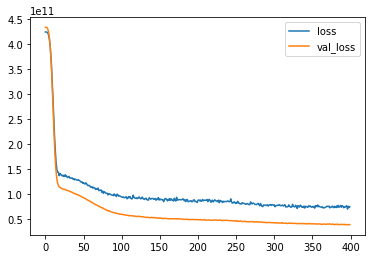

In [44]:
losses.plot()

## Evaluation on Test Data

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [46]:
predictions = model.predict(X_test)

In [47]:
mean_absolute_error(y_test,predictions)

117185.41190785733

In [48]:
print ('RMSE =', np.sqrt(mean_squared_error(y_test,predictions)))

RMSE = 195431.42272349834


In [49]:
explained_variance_score(y_test,predictions)

0.7473951794537095

In [50]:
df['price'].mean()

540088.1417665294

In [51]:
100 * (np.sqrt(mean_squared_error(y_test,predictions))/df['price'].mean())

36.18509787759419

### This model gives an RMSE which is 36% of the mean house price. This doesn't make it very useful in the real world. The above plot shows the validation loss falling lower than the training loss. This is most likely caused by too much regularisation on the training data from the dropout layers. It is therefore likely that removing the dropout layers will improve model performance. I will also experiment with model topology to find a more optimal model. 

### By empirical testing I found the below model topology gives an improved performance.

In [52]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [53]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          callbacks = [early_stop],
          batch_size=128,
          epochs=400)

Train on 15129 samples, validate on 6484 samples
Epoch 1/400
15129/15129 [==============================] - 1s 71us/sample - loss: 423601199008.2940 - val_loss: 432705279010.7440
Epoch 2/400
15129/15129 [==============================] - 0s 32us/sample - loss: 389034115700.1129 - val_loss: 268127317755.7360
Epoch 3/400
15129/15129 [==============================] - 0s 27us/sample - loss: 125596431051.5614 - val_loss: 107010353090.0925
Epoch 4/400
15129/15129 [==============================] - 0s 27us/sample - loss: 99261997805.6744 - val_loss: 102265400133.6459
Epoch 5/400
15129/15129 [==============================] - 0s 27us/sample - loss: 94747958809.4832 - val_loss: 97481541524.6095
Epoch 6/400
15129/15129 [==============================] - 0s 26us/sample - loss: 89900563721.3912 - val_loss: 91646652539.8149
Epoch 7/400
15129/15129 [==============================] - 0s 26us/sample - loss: 84497229465.0010 - val_loss: 85505841314.9809
Epoch 8/400
15129/15129 [=======================

15129/15129 [==============================] - 0s 26us/sample - loss: 29065302326.5368 - val_loss: 28177038364.4269
Epoch 65/400
15129/15129 [==============================] - 0s 25us/sample - loss: 28936065702.2672 - val_loss: 28112867756.2986
Epoch 66/400
15129/15129 [==============================] - 0s 26us/sample - loss: 28971513196.4815 - val_loss: 28019146567.5410
Epoch 67/400
15129/15129 [==============================] - 0s 28us/sample - loss: 28775948942.9837 - val_loss: 27967800131.1191
Epoch 68/400
15129/15129 [==============================] - 0s 25us/sample - loss: 28619562020.0759 - val_loss: 27889637002.0284
Epoch 69/400
15129/15129 [==============================] - 0s 25us/sample - loss: 28510133530.0416 - val_loss: 27810534788.5009
Epoch 70/400
15129/15129 [==============================] - 0s 26us/sample - loss: 28446105287.1619 - val_loss: 27872843143.0278
Epoch 71/400
15129/15129 [==============================] - 0s 27us/sample - loss: 28287728786.7402 - val_loss

15129/15129 [==============================] - 0s 26us/sample - loss: 25150808053.1705 - val_loss: 25867590975.0130
Epoch 128/400
15129/15129 [==============================] - 0s 26us/sample - loss: 25248103638.2217 - val_loss: 25419505824.4540
Epoch 129/400
15129/15129 [==============================] - 0s 26us/sample - loss: 25123747114.6582 - val_loss: 25771018595.0204
Epoch 130/400
15129/15129 [==============================] - 0s 26us/sample - loss: 25149058577.9026 - val_loss: 25428291038.2036
Epoch 131/400
15129/15129 [==============================] - 0s 26us/sample - loss: 25121659360.4251 - val_loss: 25308544543.9013
Epoch 132/400
15129/15129 [==============================] - 0s 26us/sample - loss: 25103925282.1130 - val_loss: 25581103916.3775
Epoch 133/400
15129/15129 [==============================] - 0s 25us/sample - loss: 25063287364.9706 - val_loss: 25302672397.2659
Epoch 134/400
15129/15129 [==============================] - 0s 25us/sample - loss: 24924377663.5897 - v

15129/15129 [==============================] - 0s 25us/sample - loss: 23440109210.3547 - val_loss: 24017076539.8544
Epoch 191/400
15129/15129 [==============================] - 0s 25us/sample - loss: 23431172826.6550 - val_loss: 24036457040.5429
Epoch 192/400
15129/15129 [==============================] - 0s 25us/sample - loss: 23418444825.7878 - val_loss: 24048003670.8600
Epoch 193/400
15129/15129 [==============================] - 0s 25us/sample - loss: 23744936036.3085 - val_loss: 25109557493.1030
Epoch 194/400
15129/15129 [==============================] - 0s 26us/sample - loss: 23415093737.4949 - val_loss: 23849094303.8223
Epoch 195/400
15129/15129 [==============================] - 0s 26us/sample - loss: 23298400503.1841 - val_loss: 24050051784.5676
Epoch 196/400
15129/15129 [==============================] - 0s 26us/sample - loss: 23347339508.1721 - val_loss: 23842675448.5774
Epoch 197/400
15129/15129 [==============================] - 0s 26us/sample - loss: 23255949055.8816 - v

15129/15129 [==============================] - 0s 27us/sample - loss: 21909874676.8320 - val_loss: 23065750672.6613
Epoch 254/400
15129/15129 [==============================] - 0s 26us/sample - loss: 21948785937.3103 - val_loss: 22911429745.0759
Epoch 255/400
15129/15129 [==============================] - 0s 27us/sample - loss: 21905547680.3955 - val_loss: 22989731778.0925
Epoch 256/400
15129/15129 [==============================] - 0s 25us/sample - loss: 21922008973.0039 - val_loss: 22808599339.1141
Epoch 257/400
15129/15129 [==============================] - 0s 25us/sample - loss: 21846652589.5094 - val_loss: 22881915827.5632
Epoch 258/400
15129/15129 [==============================] - 0s 25us/sample - loss: 21783153765.5946 - val_loss: 22943002252.5552
Epoch 259/400
15129/15129 [==============================] - 0s 25us/sample - loss: 21763333426.8142 - val_loss: 22909847085.7989
Epoch 260/400
15129/15129 [==============================] - 0s 25us/sample - loss: 21692573043.7237 - v

15129/15129 [==============================] - 0s 25us/sample - loss: 17244653595.4123 - val_loss: 18512423456.5330
Epoch 317/400
15129/15129 [==============================] - 0s 25us/sample - loss: 17159960051.5799 - val_loss: 18496902172.4269
Epoch 318/400
15129/15129 [==============================] - 0s 27us/sample - loss: 17044866581.0161 - val_loss: 18184039859.8791
Epoch 319/400
15129/15129 [==============================] - 0s 26us/sample - loss: 16899044116.1869 - val_loss: 18200643666.7539
Epoch 320/400
15129/15129 [==============================] - 0s 27us/sample - loss: 16902421322.1315 - val_loss: 18171207289.6039
Epoch 321/400
15129/15129 [==============================] - 0s 26us/sample - loss: 16813011722.9141 - val_loss: 18196392181.7347
Epoch 322/400
15129/15129 [==============================] - 0s 26us/sample - loss: 16842654704.9063 - val_loss: 18107246273.6188
Epoch 323/400
15129/15129 [==============================] - 0s 26us/sample - loss: 16655981915.6957 - v

15129/15129 [==============================] - 0s 25us/sample - loss: 14661898872.5801 - val_loss: 16473016804.5207
Epoch 380/400
15129/15129 [==============================] - 0s 26us/sample - loss: 14555507011.4646 - val_loss: 17061387776.3159
Epoch 381/400
15129/15129 [==============================] - 0s 27us/sample - loss: 14807453127.4495 - val_loss: 16612963322.3146
Epoch 382/400
15129/15129 [==============================] - 0s 27us/sample - loss: 14598631888.0455 - val_loss: 16428476150.0506
Epoch 383/400
15129/15129 [==============================] - 0s 27us/sample - loss: 14553111192.0534 - val_loss: 16544070603.5682
Epoch 384/400
15129/15129 [==============================] - 0s 27us/sample - loss: 14518679882.7069 - val_loss: 16657769780.2739
Epoch 385/400
15129/15129 [==============================] - 0s 25us/sample - loss: 14542775963.0992 - val_loss: 16487081691.5188
Epoch 386/400
15129/15129 [==============================] - 0s 26us/sample - loss: 14519938186.0765 - v

In [54]:
losses = pd.DataFrame(model.history.history)

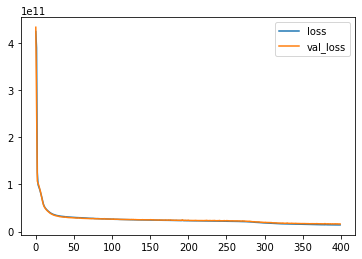

In [55]:
losses.plot()

In [56]:
predictions = model.predict(X_test)

In [57]:
mean_absolute_error(y_test,predictions)

76389.77264347818

In [58]:
np.sqrt(mean_squared_error(y_test,predictions))

127101.9104524848

In [59]:
explained_variance_score(y_test,predictions)

0.8848825425246678

In [60]:
df['price'].mean()

540088.1417665294

In [61]:
100 * (np.sqrt(mean_squared_error(y_test,predictions))/df['price'].mean())

23.533549549293515

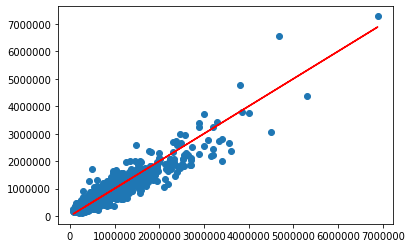

In [62]:
plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

### This model shows improved values for multiple metrics and a decent correlation with the expected values.  As the higher values show less correlation, the model could be fitted with the top 1% removed from the dataset to give a more accurate model for properties below 2 million.  It could no dought be improved by experimenting with factors such as activation functions and batch sizes but for simplicity, I will leave this project here. 

## Thank you for reading!